In [15]:
''' 
 Homework Set 3
 Ruixue Gong, N17593858
 
 Generate a scatter plot of absolute value of percentage change against market capitalization.
 price percentage change should be obtained live
 
'''

import matplotlib.pyplot as plt
import requests
import re

In [16]:
#Define a function to combine firms' symbols
def get_urlindex (a):
    y=""
    for item in a:
        x=item+"+"
        y=y+x
    return y[:-2]
  

#Define a function to request yahoo finance AQL and get daily percentage change data
def get_perc_change(item):
    url1='http://finance.yahoo.com/d/quotes.csv?s='+item+'&f=p2'
    p = requests.get(url1)
    return p.text


In [17]:
#open csv file and read the dataset

f=open("company_list_corrected.csv","r")
out=f.readlines()[1:]
out_edit=[re.sub(", ","$",x) for x in out]

#Separate symbol, name and cap 
symbol=[]
name=[]
cap=[]
for item in out_edit:
    x, y, z=item.split(',')
    symbol.append(x)
    name.append(y)
    cap.append(z)
    


In [18]:
# Define a function p_change to request daily percentage change for all firms

def p_change(symbol):
    if len(symbol)<=1500: #There is limitation on maximum AQL from website,so I request 1500 firms each time
        url=get_urlindex(symbol)
        x=get_perc_change(url)
    elif len(symbol)<=3000:
        url1=get_urlindex(symbol[0:1500])
        url2=get_urlindex(symbol[1500:len(symbol)-1])
        x_1=get_perc_change(url1)
        x_2=get_perc_change(url2)
        x=x_1+x_2
    else:
        url1=get_urlindex(symbol[0:1500])
        url21=get_urlindex(symbol[1500:3000])
        url3=get_urlindex(symbol[3000:len(symbol)])
        x_1=get_perc_change(url1)
        x_21=get_perc_change(url21)
        x_3=get_perc_change(url3)
        x=x_1+x_21+x_3
        
    return x 


In [19]:
#Store percentage change data into variable percent_change

percent_change=p_change(symbol)


'''
Following steps are taken to Crate a float-type variable per_change_price from string variable percent_change.

per_change_price stores absolute value of daily price percentage change.
'''


#split each line of string variable percent_change and create a list variable
split_lines=percent_change.splitlines()

#remove " 
list_re_quote=[re.sub('"','',x) if '"' in x else x for x in split_lines]

#remove %
list_re_perc=[re.sub('%','',x) if '%' in x else x for x in list_re_quote]

#convert 'N\A' to None
list_re_na=[None if 'N/A' in x else x for x in list_re_perc]

#convert string to float and take absolute value
per_change_price=[x if x==None else abs(float(x)) for x in list_re_na]


In [20]:
#Create a float type variable market_cap_float to capture market cap 
market_cap=[]
for item in cap:
    market_cap.append(item.split('\n')[0])

clean_M1=[re.sub(r'\.',"",x) if "M" in x else x for x in market_cap] 
clean_M2=[re.sub("M","0000",x) if "M" in x else x for x in clean_M1] 
clean_B1=[re.sub(r'\.',"",x) if "B" in x else x for x in clean_M2]
clean_B2=[re.sub("B","0000000",x) if "B" in x else x for x in clean_B1] 
clean_na=[None if x=='N/A' else x for x in clean_B2] 
market_cap_float=[x if x==None else float(x) for x in clean_na]


<IPython.core.display.Javascript object>


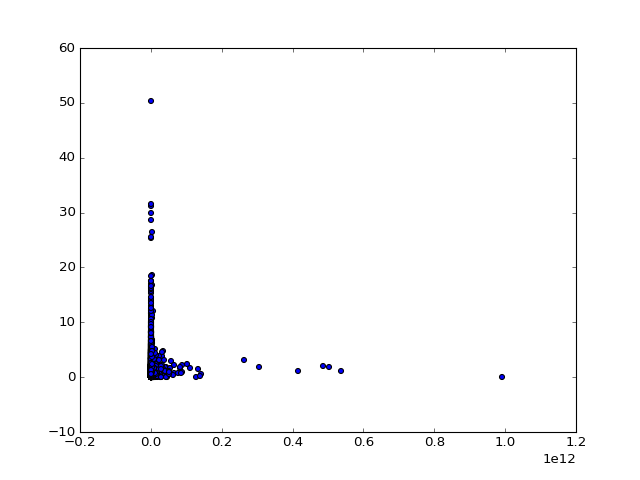

In [21]:
#Scatter plot daily price change against market_cap, and analyze the relationship between volatity of stock price and market_cap


## the data

x = market_cap_float
y = per_change_price

## left panel
%matplotlib notebook
plt.scatter(x,y)
plt.show()




#from the figure, lower capital cap stocks are more volatile w.r.t this mesure.




